<a href="https://colab.research.google.com/github/theyashmishra/Flipkart-Product-category-Classification-using-product-description/blob/main/Flipkart_Product_category_Classification_using_Product_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP**: Product category prediction using product description
                                      

1. In this block all important libraries are imported which are going to use in the model building(sklearn.naive_bayes,sklearn.linear_model),visualization(seaborn,matplotlib),text cleaning(nltk,restem.porter,stopwords),data preprocessing(labelencoder,standardscaler)

2. These libraries makes things easy and flexible.





In [ ]:
#library for dataframe and its operations
import numpy as np
import pandas as pd
#library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#text cleaning libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
#data preprocessing libraries  
from sklearn.preprocessing import LabelEncoder,StandardScaler
#library for importing models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#libraries to determine model validity
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#data reading just upload data to session storage and use it
df1=pd.read_excel("flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.xlsx")
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In this block I have dropped the columns which are of no use or do not contribute in model accuracy.the intution behind doing  is that it will decrease runtime and avoid redundancy.

In [ ]:
print(df1.columns)
df1.drop(['uniq_id', 'crawl_timestamp', 'product_url','pid', 'retail_price', 'discounted_price','image', 'is_FK_Advantage_product','product_rating',
       'overall_rating', ], axis=1,inplace=True)

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')


To check for Null values in descriptions as they produced error before while making bag of words

In [ ]:
df1[df1['description'].isnull()==True]

,product_name,product_category_tree,description,brand,product_specifications
553,Ozel Studio Casual Sleeveless Printed Women's Top,"[""Clothing >> Women's Clothing >> Western Wear...",NaN,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
17299,Amore Abstract Cushions Cover,"[""Home Furnishing >> Cushions, Pillows & Cover...",NaN,Amore,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In this block I am deleting these null records as there are 20000 records and these 2 are negligible to it and also these are not unique so we are not losing any information.

In [ ]:
df1.drop(labels=[553,17299],axis=0,inplace =True)

**Text preprocessing**:In this block we are preprocessing text
1. First we imported porterstemmer module which is used for stemming text data.
2. I have done preprocessing mainly on 2 columns 'product_category_tree' and 'description'.
3. I have ignored the deleted rows(553 and 17299)
4. first in 'product_category_tree' I removed all the elements except alphabets and spaces then i convert it all in lowercase elements and then split it and join using space and appended in the list corpus.
5. Secondly in 'description' column I removed all the elements except alphabets and spaces then i convert it all in lowercase elements after that I have deleted all the stopwords present in the description and done the stemming using porterstemmer module then split it and join it using space and appended in the list crpus
6. This is the basic operation for any NLP project
7. I have used set during stemming to improve runtime.

In [ ]:
crpus=[]
ps=PorterStemmer()
corpus=[]
for i in range(0,20000):
 if i!=553 and i!=17299:
  review=re.sub('[^a-zA-Z]',' ',df1['product_category_tree'][i])
  review=review.lower()
  review=review.split()
#we use set here with stopwords to reduce execution time
  review=' '.join(review)
  corpus.append(review)
#description preprocessing
  review=re.sub('[^a-zA-Z]',' ',df1['description'][i])
  
  review=review.lower()
  review=review.split()
  review=[ps.stem(word )for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  crpus.append(review)

In this block I have created a separate dataframe of preprocessed text to improve readability of code.

In [ ]:
#declaring and showing dataframe
df=pd.DataFrame({"product_category":corpus,"description":crpus})
df.head()

,product_category,description
0,clothing women s clothing lingerie sleep swimw...,key featur alisha solid women cycl short cotto...
1,furniture living room furniture sofa beds futo...,fabhomedecor fabric doubl sofa bed finish colo...
2,footwear women s footwear ballerinas aw bellies,key featur aw belli sandal wedg heel casual aw...
3,clothing women s clothing lingerie sleep swimw...,key featur alisha solid women cycl short cotto...
4,pet supplies grooming skin coat care shampoo s...,specif sicon purpos arnica dog shampoo ml gene...


I have figure out that main category of the data lies in the begining of product_category column elements so I have cut a strip of first word and treat it as a class itself.

In [ ]:
df['product_category'] = df['product_category'].apply(lambda x : x.split()[0][0:].strip())

**Data Visualization**

<Figure size 2160x5040 with 0 Axes>

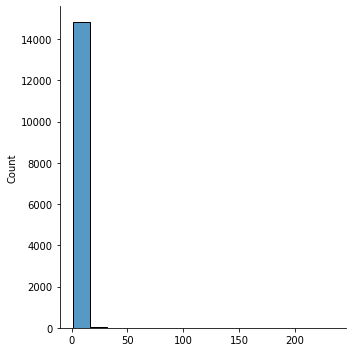

In [ ]:
#this is distplot of df.groupby(['description']).size(), i used it as it is a combination of rugplot and kdeplot
plt.figure(figsize=(30,70))
sns.displot( df.groupby(['description']).size(),kde=False)
plt.show()


<Figure size 2160x5040 with 0 Axes>

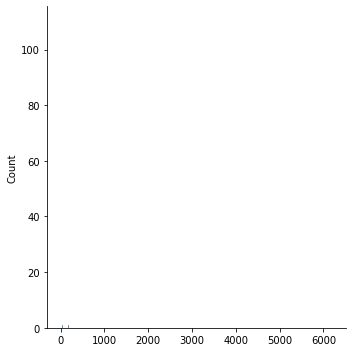

In [ ]:
#this is distplot of df.groupby([''product_category'']).size(), i used it as it is a combination of rugplot and kdeplot
plt.figure(figsize=(30,70))
sns.displot( df.groupby(['product_category']).size(),kde=False)
plt.show()


**Data Labelling**

*  In this block I used count vectorizer on 'description' column  because ountVectorizer is used to convert a collection of text documents to a vector of term/token counts.
*   I used LabelEncoder on 'product_category' column because it can normalize variables and labelencoder also convert non numerical to numerical variables.
*  I used train_test_split to split the data into training set and test set I used 75% data for training purpose to avoid overfitting.



In [ ]:
X=df['description']
y=df['product_category']
cv= CountVectorizer()
X=cv.fit_transform(X)
le=LabelEncoder()
le=le.fit(y)
y=le.transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

**Model Building**: In this part I have made 2 models

**Multinomial Naive bayes Classifier**:It is a really good model when we have to classify text data into multiple categories.

In [ ]:
#Multinomial Naive bayes
mnb=MultinomialNB()
#model fitting
mnb.fit(X_train,y_train)
#prediction
pre=mnb.predict(X_test)

* This block and the block below this is used for model validation, in this block we calculated accuracy and classification report of the model and check underfitting.
* In the block below this block we checked overfitting  by observing difference in model accuracies when prediction is done in test set and training set(if difference is high then there is overfitting and if diffrence is low there is no overfitting).
* These methods tells us how good our model is.

In [ ]:
#check accuracy and underfitting using classification report and accuracy score
r=accuracy_score(y_test,pre)
print(r)
print(classification_report(y_test,pre))

0.9144
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.92      0.99      0.95       239
          18       0.81      0.61      0.70       116
          19       0.84      0.62      0.72        87
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.86      0.96      0.91       184
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       1.00      0.18      0.31        22
          35       0.00      0.00      0.00         1
          37       0.96      0.99      0.97      1538
          38       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#check overfitting for multinomial Naive bayes using diffrence in accuracy when model predicts on X_test and X_train
print("accuracy on test set: ", accuracy_score(y_test,pre))
print("accuracy on training set: ", accuracy_score(y_train,mnb.predict(X_train)))
#here diffrence in accuracy is very less which shows out model is NOT overfitting

accuracy on test set:  0.9144
accuracy on training set:  0.934191225496733


**Logistic Regression**:I have made this Model in hope fto get much better results than multiple Naivebayes classifier

In [ ]:
lr=LogisticRegression()
#Model fitting
lr.fit(X_train,y_train)
#model prediction
pre=lr.predict(X_test)
#Model performance calcutation and check whether underfitting is there or not.
r=accuracy_score(y_test,pre)
cm=confusion_matrix(y_test,pre)
print(r)

print(classification_report(y_test,pre))

0.9568
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.98      0.98      0.98       239
          18       0.91      0.84      0.88       116
          19       0.94      0.98      0.96        87
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.95      0.95      0.95       184
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.91      0.95      0.93        22
          35       0.00      0.00      0.00         1
          37       0.97      0.99      0.98      1538
          38       0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in

**checking Accuracy**
* The Block below is used to calculate accuracy and to check underfitting
* the Block below this block is used to check overfitting  by observing difference in model accuracies when prediction is done in test set and training set(if difference is high then there is overfitting and if diffrence is low there is no overfitting).

In [ ]:
#Model gives accuracy of 96 percent which is better than  multinomail naive bayes
#check overfitting for multinoial Logistic regression using diffrence in accuracy when model predicts on X_test and X_train
print("accuracy on test set: ", accuracy_score(y_test,pre))
print("accuracy on training set: ", accuracy_score(y_train,lr.predict(X_train)))
#here difference in accuracy is very less hence model is NOT overfitting 


accuracy on test set:  0.9568
accuracy on training set:  0.9970662755034004


**Hence we see that there is also no overfitting in logistic regression model but this model do not converge to local optima so I prefered Multinomial Naive bayes algorithm I have used other algorithms(Randomforest,xgboost,etc) also but the RAM crashed during fitting phase so i end up with these two models and also these two model give fair results.**